In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
import pickle

pd.set_option('max_colwidth', None)

In [2]:
df = pd.read_excel('withFeaturesDF.xlsx', index_col=0, engine='openpyxl')

In [3]:
X = df.drop(['target', '№ п/п (КЛЮЧ)', 'Отрасль', 'Наименование'], axis=1)
y = df['target']

In [4]:
X

,String_similarity,Max_similarity,Average_similarity,More_then_average,String_1,String_2,cosine_similarity
0,1.000000,1.000000,1.000000,4,4,4,1.000000
1,0.764045,0.941176,0.914751,2,4,3,0.966284
2,0.764045,0.941176,0.914751,2,4,3,0.966284
3,0.764045,0.941176,0.914751,2,4,3,0.966284
4,0.674419,1.000000,0.870279,2,5,3,0.955090
...,...,...,...,...,...,...,...
3023,0.186916,0.500000,0.418651,1,7,3,0.743969
3024,0.350877,0.428571,0.357143,1,3,2,0.723532
3025,0.230088,0.571429,0.499248,2,8,3,0.798601
3026,0.173913,0.666667,0.448652,1,7,4,0.665344


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45)

In [6]:
clf = RandomForestClassifier()

In [7]:
parametrs = {'n_estimators': range(60, 100, 3), 'max_depth': range(7, 20)}

In [8]:
gs_clf = GridSearchCV(estimator=clf, param_grid=parametrs, cv=5, n_jobs=-1, verbose=1)

In [9]:
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 182 candidates, totalling 910 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(7, 20),
                         'n_estimators': range(60, 100, 3)},
             verbose=1)

In [10]:
gs_clf.best_params_

{'max_depth': 17, 'n_estimators': 63}

In [11]:
gs_clf.best_score_

0.9191681462732803

In [12]:
best_clf = gs_clf.best_estimator_

In [13]:
best_clf.feature_importances_

array([0.16364294, 0.24987795, 0.21876626, 0.01650539, 0.07618397,
       0.0390787 , 0.23594479])

In [14]:
best_clf.score(X_test, y_test)

0.9186813186813186

In [15]:
df['prediction'] = best_clf.predict_proba(X)[:,1]

In [16]:
df.to_excel('withRFpred.xlsx')

In [17]:
df

,target,№ п/п (КЛЮЧ),Отрасль,Наименование,String_similarity,Max_similarity,Average_similarity,More_then_average,String_1,String_2,cosine_similarity,prediction
0,1,11922,Ремонт часов и ювелирных изделий,Ремонт часов и ювелирных изделий,1.000000,1.000000,1.000000,4,4,4,1.000000,0.984127
1,1,1836,Деятельность туристических агентств и туроператоров,Туристические агентства и туроператоры,0.764045,0.941176,0.914751,2,4,3,0.966284,1.000000
2,1,1835,Деятельность туристических агентств и туроператоров,Туристические агентства и туроператоры,0.764045,0.941176,0.914751,2,4,3,0.966284,1.000000
3,1,6049,Деятельность туристических агентств и туроператоров,Туристические агентства и туроператоры,0.764045,0.941176,0.914751,2,4,3,0.966284,1.000000
4,1,2486,Предоставление услуг парикмахерскими и салонами красоты,Парикмахерские и салоны красоты,0.674419,1.000000,0.870279,2,5,3,0.955090,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3023,1,12671,Торговля розничная мясом и мясными продуктами в специализированных магазинах,Рестораны быстрого обслуживания,0.186916,0.500000,0.418651,1,7,3,0.743969,0.713607
3024,0,12687,Производство электромонтажных работ,Строительные материалы,0.350877,0.428571,0.357143,1,3,2,0.723532,0.005861
3025,1,12694,Деятельность предприятий общественного питания по прочим видам организации питания,Рестораны быстрого обслуживания,0.230088,0.571429,0.499248,2,8,3,0.798601,1.000000
3026,0,12702,Торговля розничная по почте или по информационно-коммуникационной сети Интернет,Широкий ассортимент товаров для дома,0.173913,0.666667,0.448652,1,7,4,0.665344,0.002810


In [18]:
pickle.dump(best_clf, open('RandomForest_model.sav', 'wb'))

# -----------------------------------------------------------------------------------------11k

In [243]:
df_11k = pd.read_excel('11k_withFeatures.xlsx', index_col=0)

In [248]:
df_11k['prediction'] = best_clf.predict_proba(df_11k.drop(['ИНН', '№ п/п (КЛЮЧ)', 'Отрасль', 'МСС наименование'], axis=1))[:,1]

In [254]:
df_11k.sort_values(by='prediction', ascending=False).to_excel('С разметкой.xlsx')

In [1]:
#df_11k[(0.45 <= df_11k['prediction']) & (df_11k['prediction'] <= 0.55)].sort_values(by='prediction', ascending=False)

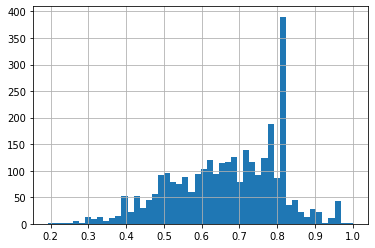

In [267]:
df['cosine_similarity'].hist(bins=50)